#Load of data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Using Modularized implementation of ViT -- ENGINE
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
set_seeds() # reproducibility


#VIT model finetunes

In [ ]:
# Using pre-trained ViT base - 16
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)
num_classes = 2
# Freezing Base Parameters
for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

In [ ]:
# changing the ViT head -- ViT base has final embedding of 768
pretrained_vit.heads = nn.Linear(in_features = pretrained_vit.heads.head.in_features, out_features = num_classes).to(device)

In [ ]:
summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

In [ ]:
cd /content/drive/MyDrive/Final_folder_code_thesis

In [ ]:
from pathlib import PosixPath
image_path = PosixPath("DeepWild_Final")
train_dir = image_path / "train"
test_dir = image_path / "val"

In [ ]:
# Get automatic transforms from pretrained ViT weights
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

In [ ]:
# Setup dataloaders
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32)

In [ ]:
import going_modular.going_modular.engine
print(going_modular.going_modular.engine.__file__)

In [ ]:
from importlib import reload
reload(going_modular.going_modular.engine)

In [ ]:
from going_modular.going_modular import engine

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

In [ ]:
torch.save(pretrained_vit.state_dict(), "/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/deepwild_pretrained_vit_state_dict.pth")


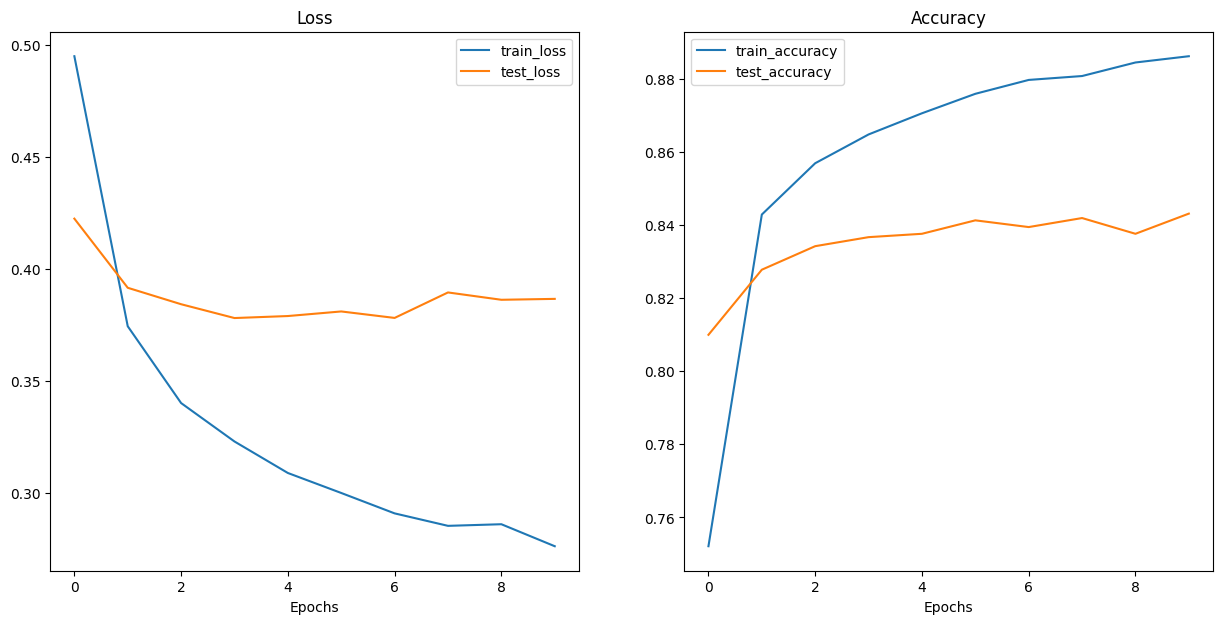

In [ ]:
# Plot the loss curves
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

In [ ]:
pretrained_vit_weights = torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/deepwild_pretrained_vit_state_dict.pth")


#Res-Net50 model finetunes



In [ ]:
# Load pre-trained ResNet-50 weights
pretrained_resnet_weights = torchvision.models.ResNet50_Weights.DEFAULT
pretrained_resnet = torchvision.models.resnet50(weights=pretrained_resnet_weights).to(device)

num_classes = 2  # Set the number of output classes

# Freezing Base Parameters
for parameter in pretrained_resnet.parameters():
    parameter.requires_grad = False


In [ ]:
# changing the resnet head -- ViT base has final embedding of 768
pretrained_resnet.fc = nn.Linear(in_features=pretrained_resnet.fc.in_features, out_features=num_classes).to(device)


In [ ]:
summary(model=pretrained_resnet,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

In [ ]:
from pathlib import PosixPath
image_path = PosixPath("DeepWild_Final")
train_dir = image_path / "train"
test_dir = image_path / "val"

In [ ]:
# Get automatic transforms from pretrained ViT weights
pretrained_resnet_transforms = pretrained_resnet_weights.transforms()
print(pretrained_resnet_transforms)

In [ ]:
# Setup dataloaders
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_resnet_transforms,
                                                                                                     batch_size=32)

In [ ]:
import going_modular.going_modular.engine
print(going_modular.going_modular.engine.__file__)

In [ ]:
from importlib import reload
reload(going_modular.going_modular.engine)

In [ ]:
from going_modular.going_modular import engine

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_resnet.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
set_seeds()
pretrained_resnet_results = engine.train(model=pretrained_resnet,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

In [ ]:
torch.save(pretrained_resnet.state_dict(), "/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/deepwild_pretrained_resnet_state_dict.pth")


In [ ]:
# Plot the loss curves
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_resnet_results)

In [ ]:
pretrained_resnet_weights = torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/deepwild_pretrained_resnet_state_dict.pth")


#Feature extraction code



In [ ]:


from pathlib import Path

image_path = Path("/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final")
train_dir = image_path / "train"
test_dir = image_path / "val"


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:



# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None, limit=None):
        self.root_dir = root_dir
        self.transform = transform

        self.image_files = []
        self.labels = []
        for label_folder in tqdm(['0_real', '1_fake'], desc="Loading dataset"):
            full_path = os.path.join(root_dir, label_folder)
            for idx, file_name in enumerate(os.listdir(full_path)):
                if limit and idx >= limit:
                    break  # Limit the number of files loaded
                if file_name.endswith(('.jpg', '.png', '.jpeg','.JPEG','.JPG','.PNG')):  # Ensure image files
                    self.image_files.append(os.path.join(full_path, file_name))
                    if 'real' in label_folder:
                        self.labels.append(0)  # Label 0 for real images
                    else:
                        self.labels.append(1)  # Label 1 for fake images

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        image = Image.open(img_path).convert("RGB")  # Ensure image is 3 channels
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        return image, label

# Data transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Paths to the training and validation directories
train_dir = "/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/train"
val_dir = "/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/val"

# Load datasets
train_dataset = CustomDataset(root_dir=train_dir, transform=data_transforms)
val_dataset = CustomDataset(root_dir=val_dir, transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4, pin_memory=True)

In [ ]:
import ssl
import certifi

# Set the SSL context to use certifi's certificates
ssl._create_default_https_context = ssl.create_default_context
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [ ]:
import torch.nn.functional as F


# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data transformations (ResNet-style transformations)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Custom dataset class
class CustomDatasetNew(Dataset):
    def __init__(self, root_dir, transform=None, limit=None):
        self.root_dir = root_dir
        self.transform = transform

        self.image_files = []
        self.labels = []
        for label_folder in tqdm(['0_real', '1_fake'], desc="Loading dataset"):
            full_path = os.path.join(root_dir, label_folder)
            for idx, file_name in enumerate(os.listdir(full_path)):
                if limit and idx >= limit:
                    break  # Limit the number of files loaded
                if file_name.endswith(('.jpg', '.png', '.jpeg','.JPEG','.JPG','.PNG')):  # Ensure image files
                    self.image_files.append(os.path.join(full_path, file_name))
                    if 'real' in label_folder:
                        self.labels.append(0)  # Label 0 for real images
                    else:
                        self.labels.append(1)  # Label 1 for fake images

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]  # This is a string path
        image = Image.open(img_path).convert("RGB")  # Ensure image is 3 channels
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, img_path  # Ensure that the path returned is a string (not a tensor)


# Load ResNet model and capture features
def load_saved_resnet_model(model_path):
    model = torchvision.models.resnet50(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False  # Freeze all layers

    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)  # Binary classification (real/fake)

    model.load_state_dict(torch.load(model_path))  # Load the saved model
    model = model.to(device)

    # Hook functions to capture low, mid, and high-level features
    model.layer1[0].register_forward_hook(lambda m, i, o: hook_fn(m, i, o, low_level_features))
    model.layer3[0].register_forward_hook(lambda m, i, o: hook_fn(m, i, o, mid_level_features))
    model.layer4[0].register_forward_hook(lambda m, i, o: hook_fn(m, i, o, high_level_features))

    model.eval()
    return model

# Hook functions to capture ResNet features
low_level_features, mid_level_features, high_level_features = [], [], []

def hook_fn(module, input, output, storage_list):
    storage_list.append(output.clone().detach())

# Define linear layers to convert ResNet features to 768 dimensions
# Define linear layers to convert ResNet features to 768 dimensions
low_to_768 = nn.Linear(256, 768).to(device)   # For low-level features
mid_to_768 = nn.Linear(1024, 768).to(device)  # For mid-level features
high_to_768 = nn.Linear(2048, 768).to(device) # For high-level features

def extract_resnet_features(model, image):
    low_level_features.clear()
    mid_level_features.clear()
    high_level_features.clear()

    with torch.no_grad():
        image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
        model(image)

    # Pool ResNet features and map to 768 dimensions
    low_pooled = F.adaptive_avg_pool2d(low_level_features[-1].to(device), (1, 1)).squeeze()
    mid_pooled = F.adaptive_avg_pool2d(mid_level_features[-1].to(device), (1, 1)).squeeze()
    high_pooled = F.adaptive_avg_pool2d(high_level_features[-1].to(device), (1, 1)).squeeze()

    low_768 = low_to_768(low_pooled)   # Shape [1, 768]
    mid_768 = mid_to_768(mid_pooled)   # Shape [1, 768]
    high_768 = high_to_768(high_pooled) # Shape [1, 768]

    return low_768, mid_768, high_768


# Function to preprocess the image using ViT's transforms
def pipeline_preprocessor():
    vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT
    return vit_weights.transforms()

# Function to extract ViT embeddings
def get_vit_embedding(vit_model, image_path):
    preprocessing = pipeline_preprocessor()  # Preprocessing from ViT
    img = Image.open(image_path).convert("RGB")  # Ensure we load image by path (string)
    img = preprocessing(img).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        feats = vit_model._process_input(img)
        batch_class_token = vit_model.class_token.expand(img.shape[0], -1, -1)
        feats = torch.cat([batch_class_token, feats], dim=1)
        feats = vit_model.encoder(feats)
        vit_hidden = feats[:, 0]  # CLS token
    return vit_hidden

# Load ViT model
def load_vit_model(pretrained_weights_path):
    vit_model = torchvision.models.vit_b_16(pretrained=False).to(device)
    pretrained_vit_weights = torch.load(pretrained_weights_path, map_location=device)
    vit_model.load_state_dict(pretrained_vit_weights, strict=False)
    vit_model.eval()  # Set to evaluation mode
    return vit_model

# Add a sequence dimension (if missing) before applying attention
def ensure_correct_shape(tensor):
    if len(tensor.shape) == 2:  # If shape is [batch_size, embedding_dim]
        tensor = tensor.unsqueeze(1)  # Add a sequence dimension: [batch_size, 1, embedding_dim]
    elif len(tensor.shape) == 1:  # If shape is [embedding_dim]
        tensor = tensor.unsqueeze(0).unsqueeze(1)  # Add batch and sequence dimensions: [1, 1, embedding_dim]
    return tensor


# Scaled dot product attention function
def scaled_dot_product_attention(Q, K, V):
    # Ensure Q, K, and V have the correct shapes
    Q = ensure_correct_shape(Q)  # Should be [batch_size, 1, embedding_dim]
    K = ensure_correct_shape(K)  # Should be [batch_size, 1, embedding_dim]
    V = ensure_correct_shape(V)  # Should be [batch_size, 1, embedding_dim]

#     print(f"Q shape after unsqueeze: {Q.shape}, K shape after unsqueeze: {K.shape}, V shape after unsqueeze: {V.shape}")  # Debugging
    d_k = Q.size(-1)
    scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32).to(Q.device))
    attn_weights = F.softmax(scores, dim=-1)
    output = torch.matmul(attn_weights, V)
    return output

# Save features for each dataset (train/val/test)
import csv

# Save features for each dataset (train/val/test) as CSV
def save_features_to_csv(model, vit_model, data_loader, save_path):
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    with open(save_path, mode="w", newline="") as file:
        writer = csv.writer(file)
        # Write the CSV header
        writer.writerow(["image_name", "features", "label"])

        for images, img_paths in tqdm(data_loader, desc="Extracting features"):
            for i in range(len(images)):
                image = images[i].to(device)  # Move image to the correct device
                img_path = img_paths[i]  # Image path

                # Ensure img_path is a string
                if isinstance(img_path, torch.Tensor):
                    img_path = img_path.item() if img_path.dim() == 0 else str(img_path)

                # Extract ResNet features
                try:
                    low_768, mid_768, high_768 = extract_resnet_features(model, image)
                except Exception as e:
                    print(f"Error extracting ResNet features for {img_path}: {e}")
                    continue

                # Extract ViT features
                try:
                    vit_hidden = get_vit_embedding(vit_model, img_path)  # img_path should be a string
                except Exception as e:
                    print(f"Error extracting ViT features for {img_path}: {e}")
                    continue

                # Apply attention between ResNet and ViT features
                try:
                    output_1 = scaled_dot_product_attention(vit_hidden, low_768, low_768)
                    output_2 = scaled_dot_product_attention(output_1, mid_768, mid_768)
                    final_output = scaled_dot_product_attention(output_2, high_768, high_768)
                except Exception as e:
                    print(f"Error applying attention for {img_path}: {e}")
                    continue

                # Convert features to a flattened list
                features = final_output.detach().cpu().numpy().flatten().tolist()


                # Extract label from the image path
                label = 0 if "real" in img_path else 1

                # Write the row to the CSV
                writer.writerow([os.path.basename(img_path), features, label])

    print(f"Features saved to {save_path}")


# Load models
resnet_model = load_saved_resnet_model('/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/deepwild_pretrained_resnet_state_dict.pth')
vit_model = load_vit_model('/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/deepwild_pretrained_vit_state_dict.pth')

train_dir = "/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/train"
val_dir = "/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/val"
test_dir="/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/test"

train_dataset = CustomDatasetNew(root_dir=train_dir, transform=data_transforms)
val_dataset = CustomDatasetNew(root_dir=val_dir, transform=data_transforms)
#test_dataset = CustomDatasetNew(root_dir=test_dir, transform=data_transforms)
for test_subdir in ['twitter', 'facebook', 'reddit']:
    test_dataset = CustomDatasetNew(root_dir=os.path.join(test_dir, test_subdir), transform=data_transforms)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
    print(f"Processing Test Dataset: {test_subdir}")

    # Save features to a separate CSV file for each subdirectory
    save_path = f"features_deepwild/test_features_{test_subdir}.csv"
    save_features_to_csv(resnet_model, vit_model, test_loader, save_path=save_path)


train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

print("Processing Train Dataset:")
save_features_to_csv(resnet_model, vit_model, train_loader, save_path="features_deepwild/train_features.csv")

print("Processing Validation Dataset:")
save_features_to_csv(resnet_model, vit_model, val_loader, save_path="features_deepwild/val_features.csv")

print("Processing Test Dataset Face:")
save_features_to_csv(resnet_model, vit_model, test_loader, save_path="features_deepwild/test_features.csv")

#Building the overall module 1 model and training it


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
from sklearn.calibration import calibration_curve
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d  # Smoothing

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
#setting seed in both numpy and torch
np.random.seed(42)
torch.manual_seed(42)

In [ ]:
#defining the function get_req_set which basically loads in the feature from above and names them, make them into tensors and create a dataset with that, wereafter a dataloader is created for a model.

def get_req_set(path):
  df = pd.read_csv(path)
  features_df = df['features'].str.strip('[]').str.split(',', expand=True)
  features_df = features_df.astype(float)
  features_df.columns = [f'feature_{i}' for i in range(features_df.shape[1])]
  df_expanded = pd.concat([features_df, df['label']], axis=1)
  X = df_expanded.drop(columns=['label'])
  y = df_expanded['label']
  X_tensor = torch.tensor(X.values, dtype=torch.float32)
  y_tensor = torch.tensor(y.values, dtype=torch.long)
  dataset = TensorDataset(X_tensor, y_tensor)
  print(len(dataset))
  temp_loader = DataLoader(dataset, batch_size=32, shuffle=True)
  return temp_loader

In [ ]:
train_loader = get_req_set('/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/train_features.csv')
val_loader_1 = get_req_set('/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/test_features_twitter.csv')
val_loader_2 = get_req_set('/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/test_features_reddit.csv')
val_loader_3 = get_req_set('/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/test_features_facebook.csv')
val_loader_4 = get_req_set('/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/val_features.csv')

In [ ]:
#creation of the Deep Neural Network.
#init initializes the class and afterwards you define what the class should look like
#the layers of the model are then defined
#lastly the method of which the data is pass through the model is defined. In this case it is forward pass, in a sequential manner.

class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim, dropout_prob=0.2):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

In [ ]:
# Updated loop with 2 validation datasets and additional metrics
input_dim = 768      # Number of features in the produced dataset
hidden_dim_1 = 128
hidden_dim_2 = 256
output_dim = 2 # Number of classes -- 2
model = DNN(input_dim, hidden_dim_1, hidden_dim_2, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        #print(outputs)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == batch_y).sum().item()
        total_samples += batch_y.size(0)

    # Calculate train loss and metrics
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_predictions / total_samples * 100
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Evaluate on train data
    model.eval()
    with torch.no_grad():
        y_true_train = []
        y_pred_train = []
        for batch_X, batch_y in train_loader:
            outputs = model(batch_X)
            _, predicted = torch.max(outputs, 1)
            y_true_train.extend(batch_y.cpu().numpy())
            y_pred_train.extend(predicted.cpu().numpy())

    # Calculate train metrics
    train_precision = precision_score(y_true_train, y_pred_train, average='binary')
    train_recall = recall_score(y_true_train, y_pred_train, average='binary')
    train_f1 = f1_score(y_true_train, y_pred_train, average='binary')

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Train Precision: {train_precision:.2f}, Train Recall: {train_recall:.2f}, Train F1: {train_f1:.2f}")

    # Validation loaders and names
    val_loaders = [val_loader_1, val_loader_2, val_loader_3, val_loader_4]
    val_names = ['Twitter','Reddit','Facebook','Validation']

    # Evaluate on each validation set
    for val_loader, val_name in zip(val_loaders, val_names):
        y_true_val = []
        y_pred_val = []
        val_loss = 0.0

        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                y_true_val.extend(batch_y.cpu().numpy())
                y_pred_val.extend(predicted.cpu().numpy())

        # Calculate metrics for each validation set
        val_loss /= len(val_loader)
        val_accuracy = accuracy_score(y_true_val, y_pred_val) * 100
        val_precision = precision_score(y_true_val, y_pred_val, average='binary')
        val_recall = recall_score(y_true_val, y_pred_val, average='binary')
        val_f1 = f1_score(y_true_val, y_pred_val, average='binary')

        print(f"{val_name} - "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%, "
              f"Val Precision: {val_precision:.2f}, Val Recall: {val_recall:.2f}, Val F1: {val_f1:.2f}")

    print("------------------------------------------------")
torch.save(model.state_dict(), '/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/final_model_1_weights.pth')

#Evaluating module 1 model and calibration

In [ ]:
import torch
import torch.nn as nn

#load the model
#and evaluate it

#outcomment the below if used from previous created model
'''input_dim = 768      # Number of features in the produced dataset
hidden_dim_1 = 128
hidden_dim_2 = 256
output_dim = 2 # Number of classes -- 2
model = DNN(input_dim, hidden_dim_1, hidden_dim_2, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
num_epochs = 10'''

model = DNN(input_dim, hidden_dim_1, hidden_dim_2, output_dim)  # Replace with your model class
model.load_state_dict(torch.load('//content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/final_model_1_weights.pth'))  # Load saved weights
model.eval()  # Set the model to evaluation mode

In [ ]:
#creates two empty lists for future use.

softmax_probs = []
true_labels = []

In [ ]:
#tells it not to do backpropagation, since we are evaluating the model. Saves time.
#afterwards, it loads the dataloader, which will feed data into the evaluator.
#next is passes the inputs through the model, to get the final prediction.
#the softmax converts the score into probabilities, which we can use to determine whether it is a fake or not.
#next the probabilities and the true labels are added into the lists, to see whether the guesses are right or not.

with torch.no_grad():
    for inputs, labels in train_loader:  # Iterate over batches
        logits = model(inputs)  # Get the model's raw predictions (logits)
        probs = F.softmax(logits, dim=1)  # Apply softmax to get probabilities
        softmax_probs.append(probs.cpu().numpy())  # Append probabilities to list
        true_labels.append(labels.cpu().numpy())  # Append true labels to list

# Once the loop is done, convert the lists to NumPy arrays
softmax_probs = np.concatenate(softmax_probs, axis=0)  # Concatenate all probabilities
true_labels = np.concatenate(true_labels, axis=0)

In [ ]:
#feines the plot calibration curve

def plot_calibration_curve(y_true, y_prob, n_bins=10, label='Uncalibrated'):
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=label)
    return prob_true, prob_pred

In [ ]:
#This code is plotting a calibration curve for the positive class in a binary classification setting.
#What we are actually seeing is how well the predicted probabilities align with the actual outcomes (meaning the labels) for the positive class (meaning real ones (label 1))


from sklearn.calibration import calibration_curve
positive_probs = softmax_probs[:, 1]
positive_labels = (true_labels == 1).astype(int)
plt.figure(figsize=(8, 6))
plot_calibration_curve(positive_labels, positive_probs, label='Uncalibrated')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Uncalibrated for Positive Class)')
plt.legend()
plt.show()

'''
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

positive_probs = softmax_probs[:, 1]
positive_labels = (true_labels == 1).astype(int)

# Get the calibration curve data
fraction_of_positives, mean_predicted_value = calibration_curve(positive_labels, positive_probs, n_bins=10)

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, label='Uncalibrated')
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')  # Perfect calibration line
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Uncalibrated for Positive Class)')
plt.legend()
plt.show()
'''

In [ ]:
#defines that logits (predictions) are the softmax probabilities

logits = softmax_probs


In [ ]:
# Assuming `softmax_probs` are already probabilities in [0, 1] (logits transformed by softmax)
positive_class_idx = 1  # Define the positive class index
positive_probs = softmax_probs[:, positive_class_idx]  # Extract positive class probabilities
positive_labels = (true_labels == positive_class_idx).astype(int)  # Binary labels for the positive class

# Fit PLATT SCALING -- scaled Logistic Regression to logits
log_reg = LogisticRegression()
log_reg.fit(positive_probs.reshape(-1,1), true_labels)  # Fit on positive class probabilities and binary labels

# Predict calibrated probabilities for the positive class
calibrated_probs_iso = log_reg.predict_proba(positive_probs.reshape(-1,1))[:,1]

# Plot Calibration Curve
def plot_calibration_curve(y_true, y_prob, n_bins=10, label=None):
    from sklearn.calibration import calibration_curve
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=label)

plt.figure(figsize=(8, 6))

# Uncalibrated
plot_calibration_curve(true_labels, positive_probs, label='Uncalibrated')

# Calibrated
plot_calibration_curve(true_labels, calibrated_probs_iso, label='Platt Scaling')

# Perfect calibration line
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')

# Plot settings
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for Positive Class (Isotonic Regression)')
plt.legend()
plt.show()

In [ ]:

# checking uncalibrated model on VAL
softmax_probs = []
true_labels = []
with torch.no_grad():
    for inputs, labels in val_loader_4: #val
        logits = model(inputs)
        probs = F.softmax(logits, dim=1)
        softmax_probs.append(probs.cpu().numpy())
        true_labels.append(labels.cpu().numpy())
softmax_probs = np.concatenate(softmax_probs, axis=0)
true_labels = np.concatenate(true_labels, axis=0)
logits = softmax_probs


In [ ]:
# Assuming `softmax_probs` are already probabilities in [0, 1] (logits transformed by softmax)
positive_class_idx = 1  # Define the positive class index
positive_probs = softmax_probs[:, positive_class_idx]  # Extract positive class probabilities
positive_labels = (true_labels == positive_class_idx).astype(int)  # Binary labels for the positive class

calibrated_probs_iso = log_reg.predict(positive_probs.reshape(-1,1))

# Plot Calibration Curve
def plot_calibration_curve(y_true, y_prob, n_bins=10, label=None):
    from sklearn.calibration import calibration_curve
    prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=n_bins, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=label)

plt.figure(figsize=(8, 6))

# Uncalibrated
plot_calibration_curve(true_labels, positive_probs, label='Uncalibrated')

# Calibrated
plot_calibration_curve(true_labels, calibrated_probs_iso, label='Isotonic Regression')

# Perfect calibration line
plt.plot([0, 1], [0, 1], 'k--', label='Perfect Calibration')

# Plot settings
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve for Positive Class (Isotonic Regression)')
plt.legend()
plt.show()

In [ ]:
import numpy as np

def compute_ece(y_true, y_prob, n_bins=600):
    bins = np.linspace(0, 1, n_bins + 1)  # Define bin edges
    bin_indices = np.digitize(y_prob, bins) - 1  # Assign probabilities to bins

    ece = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_count = np.sum(bin_mask)
        if bin_count > 0:
            bin_confidence = np.mean(y_prob[bin_mask])  # Mean predicted probability
            bin_accuracy = np.mean(y_true[bin_mask])  # Fraction of positives
            ece += (bin_count / len(y_prob)) * np.abs(bin_accuracy - bin_confidence)

    return ece

# Compute ECE for uncalibrated and calibrated models
ece_uncalibrated = compute_ece(true_labels, positive_probs)
ece_calibrated = compute_ece(true_labels, calibrated_probs_iso)

print(f"ECE (Uncalibrated) on Val: {ece_uncalibrated:.4f}")
print(f"ECE (Calibrated): on Val {ece_calibrated:.4f}")


#Module 2, training of Sobel, YOLO, FaceMesh and Xception models.

In [ ]:
!pip uninstall -y protobuf

In [ ]:
import google.protobuf
print(google.protobuf.__version__)


In [ ]:
!pip install protobuf==5.26.1

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:

!pip install mediapipe==0.10.21
!pip install pretrainedmodels
!pip install ultralytics

In [ ]:
# Importing Libraries
import os
import cv2
import torch
import numpy as np
import mediapipe as mp
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from tqdm import tqdm
import pretrainedmodels  # For Xception model
from ultralytics import YOLO  # For YOLOv8 face detection
import ssl
import logging
import matplotlib.pyplot as plt
import warnings
import torch.nn as nn

In [ ]:
#this block of code defines the models and the tranformations for the pictures to fit into the model and yield the answer we want (which is a combined answer of fake or real dependant on all the models answers)

warnings.filterwarnings("ignore")
logging.getLogger("ultralytics").setLevel(logging.WARNING)
ssl._create_default_https_context = ssl._create_unverified_context
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for Xception
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((299, 299)),  # Xception requires 299x299 input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Set up Mediapipe for facial landmarks extraction
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

# Loading YOLOv8 model
yolo_model = YOLO("yolov8n.pt").to(device)  # Ensure YOLO runs on GPU if available)  # Choose the YOLOv8 model variant based on resources
#import xception
import torch
import pretrainedmodels
import os

# Define the path where the model is saved
drive_path = "/content/drive/MyDrive/Final_folder_code_thesis/REALxception_model.pth"

# Ensure you are using the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the Xception model without pretrained weights
xception_model = pretrainedmodels.__dict__["xception"](pretrained=None).to(device)

# Modify the last linear layer to match the saved model
xception_model.last_linear = torch.nn.Linear(xception_model.last_linear.in_features, 128).to(device)

# Load the state dictionary
if os.path.exists(drive_path):
    print("Loading Xception model from Google Drive...")
    xception_model.load_state_dict(torch.load(drive_path, map_location=device))
else:
    raise FileNotFoundError(f"Model file not found at {drive_path}")





# Now the model is fully loaded with the correct architecture and weights

# Define COCO classes we are interested in (people, vehicles, animals, household items, etc.)
COCO_CLASSES = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light",
    "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
    "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush"
]

# Dataset Class
class DeepfakeDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None, limit=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        self.data = []
        self.labels = []
        self._load_data(limit)

    def _load_data(self, limit):
        if self.split == 'test':
            for platform in ['facebook', 'reddit', 'twitter']:
                for label in ['0_real', '1_fake']:
                    path = os.path.join(self.root_dir, self.split, platform, label)
                    self._load_images(path, label, limit)
        else:
            for label in ['0_real', '1_fake']:
                path = os.path.join(self.root_dir, self.split, label)
                self._load_images(path, label, limit)

    def _load_images(self, path, label, limit):
        if os.path.exists(path):
            for i, img_name in enumerate(os.listdir(path)):
                if limit and len(self.data) >= limit:
                    break
                self.data.append(os.path.join(path, img_name))
                self.labels.append(0 if label == '0_real' else 1)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data[idx]
        image = cv2.imread(img_path)
        label = self.labels[idx]

        # YOLOv8 for object detection
        results = yolo_model(image)
        detected_objects = []
        face_landmarks = np.zeros((936,), dtype=np.float32)

        for result in results[0].boxes:
            class_id = int(result.cls[0])  # YOLOv8 returns class IDs
            # class_name = YOLO.names[class_id]  # Get class name from YOLO COCO classes
            class_name = yolo_model.names[class_id]

            # Check if the detected object is one of the COCO classes we care about
            if class_name in COCO_CLASSES:
                x1, y1, x2, y2 = result.xyxy[0].cpu().numpy()
                obj_crop = image[int(y1):int(y2), int(x1):int(x2)]
                detected_objects.append(class_id)

                # If the detected object is a person, get facial landmarks
                if class_name == 'person':
                    results_face = face_mesh.process(cv2.cvtColor(obj_crop, cv2.COLOR_BGR2RGB))
                    if results_face.multi_face_landmarks:
                        face_landmarks = np.array([[p.x, p.y] for p in results_face.multi_face_landmarks[0].landmark])
                        face_landmarks = face_landmarks.flatten()

        # Encode detected objects as a one-hot vector of COCO class detections
        yolo_features = np.zeros(len(COCO_CLASSES))
        for obj_id in detected_objects:
            yolo_features[obj_id] = 1  # Mark the detected class in the one-hot vector

        # Applying Sobel edge detection
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
        sobel_combined = cv2.magnitude(sobel_x, sobel_y)
        sobel_combined = cv2.convertScaleAbs(sobel_combined)
        sobel_combined = cv2.merge([sobel_combined, sobel_combined, sobel_combined])
        # Transform the image for Xception model
        if self.transform:
            image = self.transform(image)
            sobel_combined = self.transform(sobel_combined)

        yolo_features = torch.tensor(yolo_features, dtype=torch.float32).to(device)
        face_landmarks = torch.tensor(face_landmarks, dtype=torch.float32).to(device)

        return image.to(device), sobel_combined.to(device), yolo_features, face_landmarks, torch.tensor(label, dtype=torch.long).to(device)

# Define the Classifier Model using Xception
class DeepfakeClassifier(torch.nn.Module):
    def __init__(self):
        super(DeepfakeClassifier, self).__init__()
        self.xception = xception_model  # Outputs 128 features
        self.sobel_cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.sobel_linear = None  # Will initialize dynamically
        self.fc_landmarks = nn.Linear(936, 128).to(device)  # 936 = flattened landmarks
        self.fc_yolo = nn.Linear(80, 64).to(device)  # Adjust YOLO features to 64
        self.fc1 = None  # To be initialized dynamically
        self.fc2 = nn.Linear(128, 2).to(device)

    def initialize_sobel_linear(self, input_shape):
        with torch.no_grad():
            # Initialize Sobel Linear
            sample_input = torch.zeros(1, *input_shape).to(device)
            output = self.sobel_cnn(sample_input)
            flattened_size = output.view(-1).size(0)
            self.sobel_linear = nn.Linear(flattened_size, 128).to(device)

            # Calculate the total feature size for fc1
            total_feature_size = 128 + 128 + 128 + 64  # xception + sobel + landmarks + YOLO
            self.fc1 = nn.Linear(total_feature_size, 128).to(device)

    def forward(self, image, sobel_image, yolo_features, face_landmarks):
        # Process features

        image_features = self.xception(image)  # Output: [batch_size, 128]
        sobel_features = self.sobel_cnn(sobel_image)  # Output: [batch_size, C, H, W]
        sobel_features = self.sobel_linear(sobel_features.view(sobel_features.size(0), -1))
        yolo_features = torch.relu(self.fc_yolo(yolo_features))
        landmark_features = torch.relu(self.fc_landmarks(face_landmarks))

        # Combine features
        combined = torch.cat((image_features, sobel_features, yolo_features, landmark_features), dim=1)

        # Fully connected layers
        x = torch.relu(self.fc1(combined))
        x = self.fc2(x)
        return x

In [ ]:
# Training parameters
num_epochs = 10
learning_rate = 0.001
batch_size = 16

# Dataset and DataLoader
root_dir = '/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final'  # Replace with actual path
train_dataset = DeepfakeDataset(root_dir=root_dir, split='train', transform=transform)
val_dataset = DeepfakeDataset(root_dir=root_dir, split='val', transform=transform)
test_dataset = DeepfakeDataset(root_dir=root_dir, split='test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define model, loss function, and optimizer
model = DeepfakeClassifier().to(device)
# Dynamically calculate the flattened size for sobel_cnn
model.initialize_sobel_linear(input_shape=(3, 299, 299))  # Assuming Sobel image size is 299x299
criterion = torch.nn.CrossEntropyLoss()

# Hyperparameter (tunable)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Early stopping parameters
patience = 3  # Stop if no improvement in validation loss after 5 epochs
best_val_loss = float('inf')
epochs_no_improve = 0

# Lists to store accuracy and loss values for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

best_model_path = "/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/bedst_model_module2.pth"

# Training Loop with validation and early stopping
for epoch in range(num_epochs):
    # Training Phase
    model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, sobel_images, yolo_features, landmarks, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs} - Training"):
        optimizer.zero_grad()
        outputs = model(images, sobel_images, yolo_features, landmarks)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    epoch_train_loss = running_train_loss / len(train_loader)
    epoch_train_accuracy = correct_train / total_train
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_accuracy)

    # Validation Phase
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, sobel_images, yolo_features, landmarks, labels in tqdm(val_loader, desc=f"Epoch {epoch + 1}/{num_epochs} - Validation"):
            outputs = model(images, sobel_images, yolo_features, landmarks)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    epoch_val_loss = running_val_loss / len(val_loader)
    epoch_val_accuracy = correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {epoch_train_accuracy * 100:.2f}%, "
          f"Val Loss: {epoch_val_loss:.4f}, Val Accuracy: {epoch_val_accuracy * 100:.2f}%")

    # Early Stopping and Model Selection
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), best_model_path)  # Save the best model
        print(f"Best model saved with validation loss: {best_val_loss:.4f}")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break

# Load the best model for final testing or further evaluation
model.load_state_dict(torch.load(best_model_path))
print("Loaded the best model based on validation performance.")

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy", marker='o')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy over Epochs")
plt.legend()
plt.grid(True)
plt.savefig("training_validation_accuracy_module1_WildRf.png")
print("Training and Validation accuracy plot saved as 'training_validation_accuracy_module1_WildRf.png'.")

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss", marker='o')
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.grid(True)
plt.savefig("training_validation_loss_module1_WildRf.png")
print("Training and Validation loss plot saved as 'training_validation_loss_module1_WildRf.png'.")

#Testing on module 2


In [ ]:
# Load the best model
#remember to also load the test set loader and the photos if you are running this with the saved model

model.load_state_dict(torch.load('/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/bedst_model_module2.pth'))
model.eval()  # Set to evaluation mode
print("Loaded the best model for testing.")

# Test Phase
running_test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():
    for images, sobel_images, yolo_features, landmarks, labels in tqdm(test_loader, desc="Testing on Test Set"):
        outputs = model(images, sobel_images, yolo_features, landmarks)
        loss = criterion(outputs, labels)
        running_test_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        correct_test += (preds == labels).sum().item()
        total_test += labels.size(0)

test_loss = running_test_loss / len(test_loader)
test_accuracy = correct_test / total_test

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
!pip install torchcam

In [ ]:
from torchvision.transforms.functional import to_pil_image


In [ ]:
root_dir = '/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final'  # Replace with actual path
test_dataset = DeepfakeDataset(root_dir=root_dir, split='test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

from torchcam.methods import GradCAM
# Define Model
model = DeepfakeClassifier().to(device)

# Dynamically calculate the flattened size for sobel_cnn
sobel_input_shape = (3, 299, 299)  # Assuming Sobel image size is 299x299
model.initialize_sobel_linear(input_shape=sobel_input_shape)

# Load pretrained weights
model.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/bedst_model_module2.pth"))
model.eval()

# Use TorchCAM's GradCAM
# Replace with the correct convolutional layer from your model
target_layer = "xception.block5.rep.4.pointwise"  # Example convolutional layer
grad_cam = GradCAM(model, target_layer)
import os

def gradcam_visualization_on_fake_images(model, loader, grad_cam, num_images=5, save_dir="gradcam_outputs"):
    model.eval()  # Set the model to evaluation mode
    images_processed = 0

    # Create directory to save Grad-CAM outputs
    os.makedirs(save_dir, exist_ok=True)

    for images, sobel_images, yolo_features, landmarks, labels in loader:
        images, sobel_images, yolo_features, landmarks, labels = (
            images.to(device),
            sobel_images.to(device),
            yolo_features.to(device),
            landmarks.to(device),
            labels.to(device),
        )

        for i in range(len(images)):
            # Process only fake images (label == 1)
            if labels[i].item() != 1:
                continue  # Skip non-fake images

            if images_processed >= num_images:
                return  # Stop after visualizing `num_images`

            input_image = images[i].unsqueeze(0)
            sobel_image = sobel_images[i].unsqueeze(0)
            yolo_feature = yolo_features[i].unsqueeze(0)
            landmark = landmarks[i].unsqueeze(0)

            # Forward pass to get predictions
            outputs = model(input_image, sobel_image, yolo_feature, landmark)
            pred_class = outputs.argmax(dim=1).item()

            print(f"Fake Image {images_processed + 1} - Predicted Class: {pred_class}, True Label: {labels[i].item()}")

            # Generate Grad-CAM heatmap
            activation_map = grad_cam(class_idx=pred_class, scores=outputs)  # Explicitly pass class_idx and scores

            # Remove batch dimension for visualization
            heatmap = activation_map[0].squeeze().cpu().numpy()  # Shape: (19, 19)

            # Resize heatmap to match input image dimensions
            heatmap_resized = cv2.resize(heatmap, (299, 299))  # Assuming the input image size is 299x299

            # Normalize heatmap for better visualization
            heatmap_resized = (heatmap_resized - heatmap_resized.min()) / (heatmap_resized.max() - heatmap_resized.min())

            input_image_vis = to_pil_image(input_image.squeeze().cpu())

            # Plot and save the images
            plt.figure(figsize=(10, 5))

            # Original Image
            plt.subplot(1, 3, 1)
            plt.imshow(input_image_vis)
            plt.title("Original Image")
            plt.axis("off")

            # Heatmap
            plt.subplot(1, 3, 2)
            plt.imshow(heatmap_resized, cmap="jet")
            plt.title("Grad-CAM Heatmap")
            plt.axis("off")

            # Overlayed Image
            plt.subplot(1, 3, 3)
            plt.imshow(input_image_vis)
            plt.imshow(heatmap_resized, cmap="jet", alpha=0.5)  # Overlay heatmap
            plt.title("Overlay")
            plt.axis("off")

            # Save the figure
            output_path = os.path.join(save_dir, f"gradcam_fake_output_{images_processed + 1}.png")
            plt.savefig(output_path, bbox_inches="tight")
            print(f"Saved Grad-CAM visualization for fake image as {output_path}")

            plt.close()
            images_processed += 1




# Apply Grad-CAM only on fake images from the test dataset
gradcam_visualization_on_fake_images(model, test_loader, grad_cam, num_images=20, save_dir="/content/drive/MyDrive/Final_folder_code_thesis/gradcam_fake_outputs")

#Combining the models

In [ ]:
#load packages for combining models

import os
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from PIL import Image
import cv2
from ultralytics import YOLO  # For YOLOv8 face detection
from tqdm import tqdm
import pretrainedmodels  # For Xception model
import numpy as np
import mediapipe as mp  # For facial landmark extraction
from torch.cuda.amp import autocast, GradScaler

In [ ]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
train_csv = "/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/train_features.csv"
train_folder = "/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/train"

val_csv = "/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/val_features.csv"
val_folder = "/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/val"

# Transforms for images
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

class DeepfakeClassifier(torch.nn.Module):
    def __init__(self):
        super(DeepfakeClassifier, self).__init__()
        self.xception = xception_model  # Outputs 128 features
        self.sobel_cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.sobel_linear = None  # Will initialize dynamically
        self.fc_landmarks = nn.Linear(936, 128).to(device)  # 936 = flattened landmarks
        self.fc_yolo = nn.Linear(80, 64).to(device)  # Adjust YOLO features to 64
        self.fc1 = None  # To be initialized dynamically
        self.fc2 = nn.Linear(128, 2).to(device)

    def initialize_sobel_linear(self, input_shape):
        with torch.no_grad():
            # Initialize Sobel Linear
            sample_input = torch.zeros(1, *input_shape).to(device)
            output = self.sobel_cnn(sample_input)
            flattened_size = output.view(-1).size(0)
            self.sobel_linear = nn.Linear(flattened_size, 128).to(device)

            # Calculate the total feature size for fc1
            total_feature_size = 128 + 128 + 128 + 64  # xception + sobel + landmarks + YOLO
            self.fc1 = nn.Linear(total_feature_size, 128).to(device)

    def forward(self, image, sobel_image, yolo_features, face_landmarks):
        # Process features
        yolo_features = yolo_features.float()  # Fix for dtype mismatch
        image_features = self.xception(image)  # Output: [batch_size, 128]
        sobel_features = self.sobel_cnn(sobel_image)  # Output: [batch_size, C, H, W]
        sobel_features = self.sobel_linear(sobel_features.view(sobel_features.size(0), -1))
        yolo_features = torch.relu(self.fc_yolo(yolo_features))
        landmark_features = torch.relu(self.fc_landmarks(face_landmarks))

        # Combine features
        combined = torch.cat((image_features, sobel_features, yolo_features, landmark_features), dim=1)

        # Fully connected layers
        x = torch.relu(self.fc1(combined))
        x = self.fc2(x)
        return x


# Module 2 definition (DNN)
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim, dropout_prob=0.2):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Function to process images
def process_images(folder_path, transform, limit=None):
    images = []
    filenames = []
    labels = []

    for label_dir in ["0_real", "1_fake"]:
        label_path = os.path.join(folder_path, label_dir)
        label = 0 if label_dir == "0_real" else 1

        for i, fname in enumerate(tqdm(os.listdir(label_path), desc=f"Processing {label_dir}")):
            if limit and len(images) >= limit:
                break
            img_path = os.path.join(label_path, fname)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = transform(Image.fromarray(image))
                images.append(image)
                filenames.append(fname)
                labels.append(label)

    # Convert to tensors
    X = torch.stack(images)
    y = torch.tensor(labels, dtype=torch.long)
    return X, filenames, y


# Process CSV features for Module 2
def process_csv(path, limit=None):
    df = pd.read_csv(path)
    features = df['features'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
    filenames = df['image_name'].tolist()  # Ensure CSV has 'image_name' column
    X = torch.tensor(features.tolist(), dtype=torch.float32)
    y = torch.tensor(df['label'].values, dtype=torch.long)

    if limit:
        X = X[:limit]
        filenames = filenames[:limit]
        y = y[:limit]

    return X, filenames, y


# Set up Mediapipe for facial landmarks extraction
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)


#import xception
import torch
import pretrainedmodels
import os

# Define the path where the model is saved
drive_path = "/content/drive/MyDrive/Final_folder_code_thesis/REALxception_model.pth"

# Ensure you are using the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the Xception model without pretrained weights
xception_model = pretrainedmodels.__dict__["xception"](pretrained=None).to(device)

# Modify the last linear layer to match the saved model
xception_model.last_linear = torch.nn.Linear(xception_model.last_linear.in_features, 128).to(device)

# Load the state dictionary
if os.path.exists(drive_path):
    print("Loading Xception model from Google Drive...")
    xception_model.load_state_dict(torch.load(drive_path, map_location=device))
else:
    raise FileNotFoundError(f"Model file not found at {drive_path}")





# Now the model is fully loaded with the correct architecture and weights



# Load YOLOv8 model
yolo_model = YOLO("yolov8n.pt").to(device)  # Ensure YOLO runs on GPU if available)  # Choose the YOLOv8 model variant based on resources
# Define COCO classes we are interested in (people, vehicles, animals, household items, etc.)
COCO_CLASSES = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light",
    "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
    "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush"
]

def generate_sobel_edges(image, transform):
    """
    Generates Sobel edges for a given image.
    """
    gray_image = cv2.cvtColor(image.permute(1, 2, 0).cpu().numpy(), cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    sobel_combined = cv2.merge([sobel_combined, sobel_combined, sobel_combined])
    return transform(Image.fromarray(sobel_combined))

def extract_yolo_features_and_landmarks(image):
    """
    Extracts YOLO object detection features and face landmarks from the given image.
    """
    results = yolo_model(image.permute(1, 2, 0).cpu().numpy())
    detected_objects = []
    landmarks = np.zeros((936,), dtype=np.float32)

    for result in results[0].boxes:
        class_id = int(result.cls[0])
        class_name = yolo_model.names[class_id]

        if class_name == "person":
            crop = image.permute(1, 2, 0).cpu().numpy()[
                int(result.xyxy[0][1]):int(result.xyxy[0][3]),
                int(result.xyxy[0][0]):int(result.xyxy[0][2]),
            ]
            crop = (crop * 255).astype(np.uint8) if crop.max() <= 1.0 else crop.astype(np.uint8)
            face_result = face_mesh.process(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            if face_result.multi_face_landmarks:
                landmarks = np.array(
                    [[p.x, p.y] for p in face_result.multi_face_landmarks[0].landmark]
                ).flatten()

        detected_objects.append(class_id)

    yolo_features = torch.tensor([1 if i in detected_objects else 0 for i in range(len(COCO_CLASSES))])
    return yolo_features, torch.tensor(landmarks)

def prepare_ensemble_data(csv_path, folder_path, transform, module1, module2, batch_size=4):
    """
    Prepares the ensemble dataset by processing data in batches.
    """
    images, img_filenames, labels1 = process_images(folder_path, transform)
    csv_features, csv_filenames, labels2 = process_csv(csv_path)

    img_base_names = [os.path.splitext(fname)[0] for fname in img_filenames]
    csv_base_names = [os.path.splitext(fname)[0] for fname in csv_filenames]

    mapping = {f"{base}_{labels1[i].item()}": (i, None) for i, base in enumerate(img_base_names)}
    for i, base in enumerate(csv_base_names):
        key = f"{base}_{labels2[i].item()}"
        if key in mapping:
            mapping[key] = (mapping[key][0], i)

    img_indices, csv_indices = [], []
    for key, (img_idx, csv_idx) in mapping.items():
        if csv_idx is not None:
            img_indices.append(img_idx)
            csv_indices.append(csv_idx)

    images = images[img_indices]
    labels1 = labels1[img_indices]
    csv_features = csv_features[csv_indices]

    combined_outputs_module1, combined_outputs_module2 = [], []
    for i in range(0, len(images), batch_size):
        batch_images = images[i:i + batch_size].to(device)
        sobel_images, yolo_features, face_landmarks = [], [], []

        for img in batch_images:
            sobel_images.append(generate_sobel_edges(img, transform))
            yolo, landmarks = extract_yolo_features_and_landmarks(img)
            yolo_features.append(yolo)
            face_landmarks.append(landmarks)

        sobel_images = torch.stack(sobel_images).to(device)
        yolo_features = torch.stack(yolo_features).to(device)
        face_landmarks = torch.stack(face_landmarks).to(device)

        # Get outputs from module1
        module1.eval()
        with torch.no_grad():
            module1_output = module1(batch_images, sobel_images, yolo_features, face_landmarks)
            combined_outputs_module1.append(module1_output.cpu())

        # Get outputs from module2
        module2.eval()
        with torch.no_grad():
            module2_output = module2(csv_features[i:i + batch_size].to(device))
            combined_outputs_module2.append(module2_output.cpu())

    module1_outputs = torch.cat(combined_outputs_module1, dim=0)
    module2_outputs = torch.cat(combined_outputs_module2, dim=0)

    # Ensure labels match the outputs
    min_size = min(module1_outputs.size(0), labels1.size(0), module2_outputs.size(0))
    module1_outputs = module1_outputs[:min_size]
    module2_outputs = module2_outputs[:min_size]
    labels1 = labels1[:min_size]

    # Return the dataset
    return TensorDataset(module1_outputs, module2_outputs, labels1)
# Initialize models
module1 = DeepfakeClassifier().to(device)
module1.initialize_sobel_linear(input_shape=(3, 299, 299))
module1.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/bedst_model_module2.pth"))

module2 = DNN(input_dim=768, hidden_dim_1=128, hidden_dim_2=256, output_dim=2).to(device)
module2.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/final_model_1_weights.pth"))

# Freeze weights of module1 and module2
for param in module1.parameters():
    param.requires_grad = False

for param in module2.parameters():
    param.requires_grad = False

train_dataset = prepare_ensemble_data(train_csv, train_folder, transform, module1, module2)
val_dataset = prepare_ensemble_data(val_csv, val_folder, transform, module1, module2)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Ensemble model
class EnsembleModel(nn.Module):
    def __init__(self, module1_dim, module2_dim, output_dim):
        super(EnsembleModel, self).__init__()
        self.fc1 = nn.Linear(module1_dim + module2_dim, output_dim)  # Combine module1 and module2 outputs

    def forward(self, x1_logits, x2_logits):
        # Apply softmax to logits for probabilities
        x1_probs = torch.softmax(x1_logits, dim=1)
        x2_probs = torch.softmax(x2_logits, dim=1)
        # Concatenate probabilities
        combined_probs = torch.cat((x1_probs, x2_probs), dim=1)
        # Pass through the fully connected layer
        output = self.fc1(combined_probs)
        return output

#Training the combined models



In [ ]:
#Define the accuracy function

def compute_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():
        for module1_out, module2_out, labels in dataloader:
            module1_out, module2_out, labels = module1_out.to(device), module2_out.to(device), labels.to(device)

            outputs = model(module1_out, module2_out)
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy


ensemble_model = EnsembleModel(module1_dim=2, module2_dim=2, output_dim=2).to(device)

''''
# Compute accuracy
train_accuracy = compute_accuracy(ensemble_model, train_loader, device)
val_accuracy = compute_accuracy(ensemble_model, val_loader, device)



print(f"Initial Training Accuracy: {train_accuracy:.2f}%")
print(f"Initial Validation Accuracy: {val_accuracy:.2f}%")
'''


# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(ensemble_model.parameters(), lr=0.001)

num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    ensemble_model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for module1_out, module2_out, labels in train_loader:
        module1_out, module2_out, labels = module1_out.to(device), module2_out.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = ensemble_model(module1_out, module2_out)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_acc:.2f}%")

print("Training complete!")




train_accuracy = compute_accuracy(ensemble_model, train_loader, device)
val_accuracy = compute_accuracy(ensemble_model, val_loader, device)

print(f"Final Training Accuracy: {train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {val_accuracy:.2f}%")



In [ ]:
#save the trained ensemble model

torch.save(ensemble_model.state_dict(), "/content/drive/MyDrive/Final_folder_code_thesis/Original_model/ensemble_model_weights.pth")



#FACEBOOK TEST DATA


In [ ]:
!pip uninstall -y protobuf

In [ ]:
!pip install protobuf==5.26.1

In [ ]:
import google.protobuf
print(google.protobuf.__version__)

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:

!pip install mediapipe==0.10.21
!pip install pretrainedmodels
!pip install ultralytics

In [ ]:
#load packages for combining models

import os
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from PIL import Image
import cv2
from ultralytics import YOLO  # For YOLOv8 face detection
from tqdm import tqdm
import pretrainedmodels  # For Xception model
import numpy as np
import mediapipe as mp  # For facial landmark extraction
from torch.cuda.amp import autocast, GradScaler

In [ ]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
test_csv = "/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/test_features_facebook.csv"
test_folder = "/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/test/facebook"

# Transforms for images
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

class DeepfakeClassifier(torch.nn.Module):
    def __init__(self):
        super(DeepfakeClassifier, self).__init__()
        self.xception = xception_model  # Outputs 128 features
        self.sobel_cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.sobel_linear = None  # Will initialize dynamically
        self.fc_landmarks = nn.Linear(936, 128).to(device)  # 936 = flattened landmarks
        self.fc_yolo = nn.Linear(80, 64).to(device)  # Adjust YOLO features to 64
        self.fc1 = None  # To be initialized dynamically
        self.fc2 = nn.Linear(128, 2).to(device)

    def initialize_sobel_linear(self, input_shape):
        with torch.no_grad():
            # Initialize Sobel Linear
            sample_input = torch.zeros(1, *input_shape).to(device)
            output = self.sobel_cnn(sample_input)
            flattened_size = output.view(-1).size(0)
            self.sobel_linear = nn.Linear(flattened_size, 128).to(device)

            # Calculate the total feature size for fc1
            total_feature_size = 128 + 128 + 128 + 64  # xception + sobel + landmarks + YOLO
            self.fc1 = nn.Linear(total_feature_size, 128).to(device)

    def forward(self, image, sobel_image, yolo_features, face_landmarks):
        # Process features
        yolo_features = yolo_features.float()  # Fix for dtype mismatch
        image_features = self.xception(image)  # Output: [batch_size, 128]
        sobel_features = self.sobel_cnn(sobel_image)  # Output: [batch_size, C, H, W]
        sobel_features = self.sobel_linear(sobel_features.view(sobel_features.size(0), -1))
        yolo_features = torch.relu(self.fc_yolo(yolo_features))
        landmark_features = torch.relu(self.fc_landmarks(face_landmarks))

        # Combine features
        combined = torch.cat((image_features, sobel_features, yolo_features, landmark_features), dim=1)

        # Fully connected layers
        x = torch.relu(self.fc1(combined))
        x = self.fc2(x)
        return x


# Module 2 definition (DNN)
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim, dropout_prob=0.2):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Function to process images
def process_images(folder_path, transform, limit=None):
    images = []
    filenames = []
    labels = []

    for label_dir in ["0_real", "1_fake"]:
        label_path = os.path.join(folder_path, label_dir)
        label = 0 if label_dir == "0_real" else 1

        for i, fname in enumerate(tqdm(os.listdir(label_path), desc=f"Processing {label_dir}")):
            if limit and len(images) >= limit:
                break
            img_path = os.path.join(label_path, fname)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = transform(Image.fromarray(image))
                images.append(image)
                filenames.append(fname)
                labels.append(label)

    # Convert to tensors
    X = torch.stack(images)
    y = torch.tensor(labels, dtype=torch.long)
    return X, filenames, y


# Process CSV features for Module 2
def process_csv(path, limit=None):
    df = pd.read_csv(path)
    features = df['features'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
    filenames = df['image_name'].tolist()  # Ensure CSV has 'image_name' column
    X = torch.tensor(features.tolist(), dtype=torch.float32)
    y = torch.tensor(df['label'].values, dtype=torch.long)

    if limit:
        X = X[:limit]
        filenames = filenames[:limit]
        y = y[:limit]

    return X, filenames, y


# Set up Mediapipe for facial landmarks extraction
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

#import xception
import torch
import pretrainedmodels
import os

# Define the path where the model is saved
drive_path = "/content/drive/MyDrive/Final_folder_code_thesis/REALxception_model.pth"

# Ensure you are using the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the Xception model without pretrained weights
xception_model = pretrainedmodels.__dict__["xception"](pretrained=None).to(device)

# Modify the last linear layer to match the saved model
xception_model.last_linear = torch.nn.Linear(xception_model.last_linear.in_features, 128).to(device)

# Load the state dictionary
if os.path.exists(drive_path):
    print("Loading Xception model from Google Drive...")
    xception_model.load_state_dict(torch.load(drive_path, map_location=device))
else:
    raise FileNotFoundError(f"Model file not found at {drive_path}")





# Now the model is fully loaded with the correct architecture and weights


# Load YOLOv8 model
yolo_model = YOLO("yolov8n.pt").to(device)  # Ensure YOLO runs on GPU if available)  # Choose the YOLOv8 model variant based on resources
# Define COCO classes we are interested in (people, vehicles, animals, household items, etc.)
COCO_CLASSES = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light",
    "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
    "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush"
]

def generate_sobel_edges(image, transform):
    """
    Generates Sobel edges for a given image.
    """
    gray_image = cv2.cvtColor(image.permute(1, 2, 0).cpu().numpy(), cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    sobel_combined = cv2.merge([sobel_combined, sobel_combined, sobel_combined])
    return transform(Image.fromarray(sobel_combined))

def extract_yolo_features_and_landmarks(image):
    """
    Extracts YOLO object detection features and face landmarks from the given image.
    """
    results = yolo_model(image.permute(1, 2, 0).cpu().numpy())
    detected_objects = []
    landmarks = np.zeros((936,), dtype=np.float32)

    for result in results[0].boxes:
        class_id = int(result.cls[0])
        class_name = yolo_model.names[class_id]

        if class_name == "person":
            crop = image.permute(1, 2, 0).cpu().numpy()[
                int(result.xyxy[0][1]):int(result.xyxy[0][3]),
                int(result.xyxy[0][0]):int(result.xyxy[0][2]),
            ]
            crop = (crop * 255).astype(np.uint8) if crop.max() <= 1.0 else crop.astype(np.uint8)
            face_result = face_mesh.process(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            if face_result.multi_face_landmarks:
                landmarks = np.array(
                    [[p.x, p.y] for p in face_result.multi_face_landmarks[0].landmark]
                ).flatten()

        detected_objects.append(class_id)

    yolo_features = torch.tensor([1 if i in detected_objects else 0 for i in range(len(COCO_CLASSES))])
    return yolo_features, torch.tensor(landmarks)

def prepare_ensemble_data(csv_path, folder_path, transform, module1, module2, batch_size=4):
    """
    Prepares the ensemble dataset by processing data in batches.
    """
    images, img_filenames, labels1 = process_images(folder_path, transform)
    csv_features, csv_filenames, labels2 = process_csv(csv_path)

    img_base_names = [os.path.splitext(fname)[0] for fname in img_filenames]
    csv_base_names = [os.path.splitext(fname)[0] for fname in csv_filenames]

    mapping = {f"{base}_{labels1[i].item()}": (i, None) for i, base in enumerate(img_base_names)}
    for i, base in enumerate(csv_base_names):
        key = f"{base}_{labels2[i].item()}"
        if key in mapping:
            mapping[key] = (mapping[key][0], i)

    img_indices, csv_indices = [], []
    for key, (img_idx, csv_idx) in mapping.items():
        if csv_idx is not None:
            img_indices.append(img_idx)
            csv_indices.append(csv_idx)

    images = images[img_indices]
    labels1 = labels1[img_indices]
    csv_features = csv_features[csv_indices]

    combined_outputs_module1, combined_outputs_module2 = [], []
    for i in range(0, len(images), batch_size):
        batch_images = images[i:i + batch_size].to(device)
        sobel_images, yolo_features, face_landmarks = [], [], []

        for img in batch_images:
            sobel_images.append(generate_sobel_edges(img, transform))
            yolo, landmarks = extract_yolo_features_and_landmarks(img)
            yolo_features.append(yolo)
            face_landmarks.append(landmarks)

        sobel_images = torch.stack(sobel_images).to(device)
        yolo_features = torch.stack(yolo_features).to(device)
        face_landmarks = torch.stack(face_landmarks).to(device)

        # Get outputs from module1
        module1.eval()
        with torch.no_grad():
            module1_output = module1(batch_images, sobel_images, yolo_features, face_landmarks)
            combined_outputs_module1.append(module1_output.cpu())

        # Get outputs from module2
        module2.eval()
        with torch.no_grad():
            module2_output = module2(csv_features[i:i + batch_size].to(device))
            combined_outputs_module2.append(module2_output.cpu())

    module1_outputs = torch.cat(combined_outputs_module1, dim=0)
    module2_outputs = torch.cat(combined_outputs_module2, dim=0)

    # Ensure labels match the outputs
    min_size = min(module1_outputs.size(0), labels1.size(0), module2_outputs.size(0))
    module1_outputs = module1_outputs[:min_size]
    module2_outputs = module2_outputs[:min_size]
    labels1 = labels1[:min_size]

    # Return the dataset
    return TensorDataset(module1_outputs, module2_outputs, labels1)
# Initialize models
module1 = DeepfakeClassifier().to(device)
module1.initialize_sobel_linear(input_shape=(3, 299, 299))
module1.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/bedst_model_module2.pth"))

module2 = DNN(input_dim=768, hidden_dim_1=128, hidden_dim_2=256, output_dim=2).to(device)
module2.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/final_model_1_weights.pth"))

# Freeze weights of module1 and module2
for param in module1.parameters():
    param.requires_grad = False

for param in module2.parameters():
    param.requires_grad = False

test_dataset = prepare_ensemble_data(test_csv, test_folder, transform, module1, module2)

test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

# Ensemble model
class EnsembleModel(nn.Module):
    def __init__(self, module1_dim, module2_dim, output_dim):
        super(EnsembleModel, self).__init__()
        self.fc1 = nn.Linear(module1_dim + module2_dim, output_dim)  # Combine module1 and module2 outputs

    def forward(self, x1_logits, x2_logits):
        # Apply softmax to logits for probabilities
        x1_probs = torch.softmax(x1_logits, dim=1)
        x2_probs = torch.softmax(x2_logits, dim=1)
        # Concatenate probabilities
        combined_probs = torch.cat((x1_probs, x2_probs), dim=1)
        # Pass through the fully connected layer
        output = self.fc1(combined_probs)
        return output

In [ ]:
import torch
from torch import nn

# Define the accuracy function
def compute_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to track gradients for evaluation
        for module1_out, module2_out, labels in dataloader:
            module1_out, module2_out, labels = module1_out.to(device), module2_out.to(device), labels.to(device)

            outputs = model(module1_out, module2_out)
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Assuming EnsembleModel is defined and loaded correctly
ensemble_model = EnsembleModel(module1_dim=2, module2_dim=2, output_dim=2).to(device)

# Load the trained weights from the saved model
ensemble_model.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/ensemble_model_weights.pth"))

# Set the model to evaluation mode
ensemble_model.eval()

# Now compute the accuracy on the test set
test_accuracy = compute_accuracy(ensemble_model, test_loader, device)

# Print the test accuracy
print(f"Test Accuracy facebook: {test_accuracy:.2f}%")


Test Accuracy facebook: 88.62%


In [ ]:
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score, accuracy_score
)
import matplotlib.pyplot as plt

# Store predictions and labels
all_preds = []
all_labels = []
all_probs = []

ensemble_model.eval()
with torch.no_grad():
    for module1_out, module2_out, labels in test_loader:
        module1_out, module2_out = module1_out.to(device), module2_out.to(device)
        outputs = ensemble_model(module1_out, module2_out)

        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for class 1 (fake)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# === ROC & AUC ===
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='magenta', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Deepfake Detection (Facebook Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# === Confusion Matrix ===
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
plt.figure(figsize=(6, 6))
disp.plot(cmap="RdPu", values_format="d")
plt.title("Confusion Matrix for Deepfake Detection (Facebook Test Set)")
plt.grid(False)
plt.show()

# === Metrics ===
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, pos_label=1)
recall = recall_score(all_labels, all_preds, pos_label=1)
f1 = f1_score(all_labels, all_preds, pos_label=1)

print(f"✅ Evaluation Results for Facebook Test Set")
print(f"Accuracy       : {accuracy:.4f}")
print(f"AUC Score      : {roc_auc:.4f}")
print(f"Precision (Fake): {precision:.4f}")
print(f"Recall (Fake)  : {recall:.4f}")
print(f"F1 Score (Fake): {f1:.4f}")



#REDDIT TEST DATA


In [ ]:
#load packages for combining models

import os
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from PIL import Image
import cv2
from ultralytics import YOLO  # For YOLOv8 face detection
from tqdm import tqdm
import pretrainedmodels  # For Xception model
import numpy as np
import mediapipe as mp  # For facial landmark extraction
from torch.cuda.amp import autocast, GradScaler

In [ ]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
test_csv = "/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/test_features_reddit.csv"
test_folder = "/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/test/reddit"

# Transforms for images
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

class DeepfakeClassifier(torch.nn.Module):
    def __init__(self):
        super(DeepfakeClassifier, self).__init__()
        self.xception = xception_model  # Outputs 128 features
        self.sobel_cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.sobel_linear = None  # Will initialize dynamically
        self.fc_landmarks = nn.Linear(936, 128).to(device)  # 936 = flattened landmarks
        self.fc_yolo = nn.Linear(80, 64).to(device)  # Adjust YOLO features to 64
        self.fc1 = None  # To be initialized dynamically
        self.fc2 = nn.Linear(128, 2).to(device)

    def initialize_sobel_linear(self, input_shape):
        with torch.no_grad():
            # Initialize Sobel Linear
            sample_input = torch.zeros(1, *input_shape).to(device)
            output = self.sobel_cnn(sample_input)
            flattened_size = output.view(-1).size(0)
            self.sobel_linear = nn.Linear(flattened_size, 128).to(device)

            # Calculate the total feature size for fc1
            total_feature_size = 128 + 128 + 128 + 64  # xception + sobel + landmarks + YOLO
            self.fc1 = nn.Linear(total_feature_size, 128).to(device)

    def forward(self, image, sobel_image, yolo_features, face_landmarks):
        # Process features
        yolo_features = yolo_features.float()  # Fix for dtype mismatch
        image_features = self.xception(image)  # Output: [batch_size, 128]
        sobel_features = self.sobel_cnn(sobel_image)  # Output: [batch_size, C, H, W]
        sobel_features = self.sobel_linear(sobel_features.view(sobel_features.size(0), -1))
        yolo_features = torch.relu(self.fc_yolo(yolo_features))
        landmark_features = torch.relu(self.fc_landmarks(face_landmarks))

        # Combine features
        combined = torch.cat((image_features, sobel_features, yolo_features, landmark_features), dim=1)

        # Fully connected layers
        x = torch.relu(self.fc1(combined))
        x = self.fc2(x)
        return x


# Module 2 definition (DNN)
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim, dropout_prob=0.2):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Function to process images
def process_images(folder_path, transform, limit=None):
    images = []
    filenames = []
    labels = []

    for label_dir in ["0_real", "1_fake"]:
        label_path = os.path.join(folder_path, label_dir)
        label = 0 if label_dir == "0_real" else 1

        for i, fname in enumerate(tqdm(os.listdir(label_path), desc=f"Processing {label_dir}")):
            if limit and len(images) >= limit:
                break
            img_path = os.path.join(label_path, fname)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = transform(Image.fromarray(image))
                images.append(image)
                filenames.append(fname)
                labels.append(label)

    # Convert to tensors
    X = torch.stack(images)
    y = torch.tensor(labels, dtype=torch.long)
    return X, filenames, y


# Process CSV features for Module 2
def process_csv(path, limit=None):
    df = pd.read_csv(path)
    features = df['features'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
    filenames = df['image_name'].tolist()  # Ensure CSV has 'image_name' column
    X = torch.tensor(features.tolist(), dtype=torch.float32)
    y = torch.tensor(df['label'].values, dtype=torch.long)

    if limit:
        X = X[:limit]
        filenames = filenames[:limit]
        y = y[:limit]

    return X, filenames, y


# Set up Mediapipe for facial landmarks extraction
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

#import xception
import torch
import pretrainedmodels
import os

# Define the path where the model is saved
drive_path = "/content/drive/MyDrive/Final_folder_code_thesis/REALxception_model.pth"

# Ensure you are using the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the Xception model without pretrained weights
xception_model = pretrainedmodels.__dict__["xception"](pretrained=None).to(device)

# Modify the last linear layer to match the saved model
xception_model.last_linear = torch.nn.Linear(xception_model.last_linear.in_features, 128).to(device)

# Load the state dictionary
if os.path.exists(drive_path):
    print("Loading Xception model from Google Drive...")
    xception_model.load_state_dict(torch.load(drive_path, map_location=device))
else:
    raise FileNotFoundError(f"Model file not found at {drive_path}")





# Now the model is fully loaded with the correct architecture and weights

# Load YOLOv8 model
yolo_model = YOLO("yolov8n.pt").to(device)  # Ensure YOLO runs on GPU if available)  # Choose the YOLOv8 model variant based on resources
# Define COCO classes we are interested in (people, vehicles, animals, household items, etc.)
COCO_CLASSES = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light",
    "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
    "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush"
]

def generate_sobel_edges(image, transform):
    """
    Generates Sobel edges for a given image.
    """
    gray_image = cv2.cvtColor(image.permute(1, 2, 0).cpu().numpy(), cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    sobel_combined = cv2.merge([sobel_combined, sobel_combined, sobel_combined])
    return transform(Image.fromarray(sobel_combined))

def extract_yolo_features_and_landmarks(image):
    """
    Extracts YOLO object detection features and face landmarks from the given image.
    """
    results = yolo_model(image.permute(1, 2, 0).cpu().numpy())
    detected_objects = []
    landmarks = np.zeros((936,), dtype=np.float32)

    for result in results[0].boxes:
        class_id = int(result.cls[0])
        class_name = yolo_model.names[class_id]

        if class_name == "person":
            crop = image.permute(1, 2, 0).cpu().numpy()[
                int(result.xyxy[0][1]):int(result.xyxy[0][3]),
                int(result.xyxy[0][0]):int(result.xyxy[0][2]),
            ]
            crop = (crop * 255).astype(np.uint8) if crop.max() <= 1.0 else crop.astype(np.uint8)
            face_result = face_mesh.process(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            if face_result.multi_face_landmarks:
                landmarks = np.array(
                    [[p.x, p.y] for p in face_result.multi_face_landmarks[0].landmark]
                ).flatten()

        detected_objects.append(class_id)

    yolo_features = torch.tensor([1 if i in detected_objects else 0 for i in range(len(COCO_CLASSES))])
    return yolo_features, torch.tensor(landmarks)

def prepare_ensemble_data(csv_path, folder_path, transform, module1, module2, batch_size=4):
    """
    Prepares the ensemble dataset by processing data in batches.
    """
    images, img_filenames, labels1 = process_images(folder_path, transform)
    csv_features, csv_filenames, labels2 = process_csv(csv_path)

    img_base_names = [os.path.splitext(fname)[0] for fname in img_filenames]
    csv_base_names = [os.path.splitext(fname)[0] for fname in csv_filenames]

    mapping = {f"{base}_{labels1[i].item()}": (i, None) for i, base in enumerate(img_base_names)}
    for i, base in enumerate(csv_base_names):
        key = f"{base}_{labels2[i].item()}"
        if key in mapping:
            mapping[key] = (mapping[key][0], i)

    img_indices, csv_indices = [], []
    for key, (img_idx, csv_idx) in mapping.items():
        if csv_idx is not None:
            img_indices.append(img_idx)
            csv_indices.append(csv_idx)

    images = images[img_indices]
    labels1 = labels1[img_indices]
    csv_features = csv_features[csv_indices]

    combined_outputs_module1, combined_outputs_module2 = [], []
    for i in range(0, len(images), batch_size):
        batch_images = images[i:i + batch_size].to(device)
        sobel_images, yolo_features, face_landmarks = [], [], []

        for img in batch_images:
            sobel_images.append(generate_sobel_edges(img, transform))
            yolo, landmarks = extract_yolo_features_and_landmarks(img)
            yolo_features.append(yolo)
            face_landmarks.append(landmarks)

        sobel_images = torch.stack(sobel_images).to(device)
        yolo_features = torch.stack(yolo_features).to(device)
        face_landmarks = torch.stack(face_landmarks).to(device)

        # Get outputs from module1
        module1.eval()
        with torch.no_grad():
            module1_output = module1(batch_images, sobel_images, yolo_features, face_landmarks)
            combined_outputs_module1.append(module1_output.cpu())

        # Get outputs from module2
        module2.eval()
        with torch.no_grad():
            module2_output = module2(csv_features[i:i + batch_size].to(device))
            combined_outputs_module2.append(module2_output.cpu())

    module1_outputs = torch.cat(combined_outputs_module1, dim=0)
    module2_outputs = torch.cat(combined_outputs_module2, dim=0)

    # Ensure labels match the outputs
    min_size = min(module1_outputs.size(0), labels1.size(0), module2_outputs.size(0))
    module1_outputs = module1_outputs[:min_size]
    module2_outputs = module2_outputs[:min_size]
    labels1 = labels1[:min_size]

    # Return the dataset
    return TensorDataset(module1_outputs, module2_outputs, labels1)
# Initialize models
module1 = DeepfakeClassifier().to(device)
module1.initialize_sobel_linear(input_shape=(3, 299, 299))
module1.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/bedst_model_module2.pth"))

module2 = DNN(input_dim=768, hidden_dim_1=128, hidden_dim_2=256, output_dim=2).to(device)
module2.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/final_model_1_weights.pth"))

# Freeze weights of module1 and module2
for param in module1.parameters():
    param.requires_grad = False

for param in module2.parameters():
    param.requires_grad = False

test_dataset = prepare_ensemble_data(test_csv, test_folder, transform, module1, module2)

test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

# Ensemble model
class EnsembleModel(nn.Module):
    def __init__(self, module1_dim, module2_dim, output_dim):
        super(EnsembleModel, self).__init__()
        self.fc1 = nn.Linear(module1_dim + module2_dim, output_dim)  # Combine module1 and module2 outputs

    def forward(self, x1_logits, x2_logits):
        # Apply softmax to logits for probabilities
        x1_probs = torch.softmax(x1_logits, dim=1)
        x2_probs = torch.softmax(x2_logits, dim=1)
        # Concatenate probabilities
        combined_probs = torch.cat((x1_probs, x2_probs), dim=1)
        # Pass through the fully connected layer
        output = self.fc1(combined_probs)
        return output

In [ ]:
import torch
from torch import nn

# Define the accuracy function
def compute_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to track gradients for evaluation
        for module1_out, module2_out, labels in dataloader:
            module1_out, module2_out, labels = module1_out.to(device), module2_out.to(device), labels.to(device)

            outputs = model(module1_out, module2_out)
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Assuming EnsembleModel is defined and loaded correctly
ensemble_model = EnsembleModel(module1_dim=2, module2_dim=2, output_dim=2).to(device)

# Load the trained weights from the saved model
ensemble_model.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/ensemble_model_weights.pth"))

# Set the model to evaluation mode
ensemble_model.eval()

# Now compute the accuracy on the test set
test_accuracy = compute_accuracy(ensemble_model, test_loader, device)

# Print the test accuracy
print(f"Test Accuracy reddit: {test_accuracy:.2f}%")


Test Accuracy reddit: 87.72%


In [ ]:
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score, accuracy_score
)
import matplotlib.pyplot as plt

# Store predictions and labels
all_preds = []
all_labels = []
all_probs = []

ensemble_model.eval()
with torch.no_grad():
    for module1_out, module2_out, labels in test_loader:
        module1_out, module2_out = module1_out.to(device), module2_out.to(device)
        outputs = ensemble_model(module1_out, module2_out)

        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for class 1 (fake)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# === ROC & AUC ===
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='magenta', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Deepfake Detection (Reddit Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# === Confusion Matrix ===
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
plt.figure(figsize=(6, 6))
disp.plot(cmap="RdPu", values_format="d")
plt.title("Confusion Matrix for Deepfake Detection (Reddit Test Set)")
plt.grid(False)
plt.show()

# === Metrics ===
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, pos_label=1)
recall = recall_score(all_labels, all_preds, pos_label=1)
f1 = f1_score(all_labels, all_preds, pos_label=1)

print(f"✅ Evaluation Results for Reddit Test Set")
print(f"Accuracy       : {accuracy:.4f}")
print(f"AUC Score      : {roc_auc:.4f}")
print(f"Precision (Fake): {precision:.4f}")
print(f"Recall (Fake)  : {recall:.4f}")
print(f"F1 Score (Fake): {f1:.4f}")



#TWITTER TEST DATA


In [ ]:
#load packages for combining models

import os
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
from PIL import Image
import cv2
from ultralytics import YOLO  # For YOLOv8 face detection
from tqdm import tqdm
import pretrainedmodels  # For Xception model
import numpy as np
import mediapipe as mp  # For facial landmark extraction
from torch.cuda.amp import autocast, GradScaler

In [ ]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths
test_csv = "/content/drive/MyDrive/Final_folder_code_thesis/features_deepwild/test_features_twitter.csv"
test_folder = "/content/drive/MyDrive/Final_folder_code_thesis/DeepWild_Final/test/twitter"

# Transforms for images
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

class DeepfakeClassifier(torch.nn.Module):
    def __init__(self):
        super(DeepfakeClassifier, self).__init__()
        self.xception = xception_model  # Outputs 128 features
        self.sobel_cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.sobel_linear = None  # Will initialize dynamically
        self.fc_landmarks = nn.Linear(936, 128).to(device)  # 936 = flattened landmarks
        self.fc_yolo = nn.Linear(80, 64).to(device)  # Adjust YOLO features to 64
        self.fc1 = None  # To be initialized dynamically
        self.fc2 = nn.Linear(128, 2).to(device)

    def initialize_sobel_linear(self, input_shape):
        with torch.no_grad():
            # Initialize Sobel Linear
            sample_input = torch.zeros(1, *input_shape).to(device)
            output = self.sobel_cnn(sample_input)
            flattened_size = output.view(-1).size(0)
            self.sobel_linear = nn.Linear(flattened_size, 128).to(device)

            # Calculate the total feature size for fc1
            total_feature_size = 128 + 128 + 128 + 64  # xception + sobel + landmarks + YOLO
            self.fc1 = nn.Linear(total_feature_size, 128).to(device)

    def forward(self, image, sobel_image, yolo_features, face_landmarks):
        # Process features
        yolo_features = yolo_features.float()  # Fix for dtype mismatch
        image_features = self.xception(image)  # Output: [batch_size, 128]
        sobel_features = self.sobel_cnn(sobel_image)  # Output: [batch_size, C, H, W]
        sobel_features = self.sobel_linear(sobel_features.view(sobel_features.size(0), -1))
        yolo_features = torch.relu(self.fc_yolo(yolo_features))
        landmark_features = torch.relu(self.fc_landmarks(face_landmarks))

        # Combine features
        combined = torch.cat((image_features, sobel_features, yolo_features, landmark_features), dim=1)

        # Fully connected layers
        x = torch.relu(self.fc1(combined))
        x = self.fc2(x)
        return x


# Module 2 definition (DNN)
class DNN(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim, dropout_prob=0.2):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Function to process images
def process_images(folder_path, transform, limit=None):
    images = []
    filenames = []
    labels = []

    for label_dir in ["0_real", "1_fake"]:
        label_path = os.path.join(folder_path, label_dir)
        label = 0 if label_dir == "0_real" else 1

        for i, fname in enumerate(tqdm(os.listdir(label_path), desc=f"Processing {label_dir}")):
            if limit and len(images) >= limit:
                break
            img_path = os.path.join(label_path, fname)
            image = cv2.imread(img_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = transform(Image.fromarray(image))
                images.append(image)
                filenames.append(fname)
                labels.append(label)

    # Convert to tensors
    X = torch.stack(images)
    y = torch.tensor(labels, dtype=torch.long)
    return X, filenames, y


# Process CSV features for Module 2
def process_csv(path, limit=None):
    df = pd.read_csv(path)
    features = df['features'].apply(lambda x: list(map(float, x.strip('[]').split(','))))
    filenames = df['image_name'].tolist()  # Ensure CSV has 'image_name' column
    X = torch.tensor(features.tolist(), dtype=torch.float32)
    y = torch.tensor(df['label'].values, dtype=torch.long)

    if limit:
        X = X[:limit]
        filenames = filenames[:limit]
        y = y[:limit]

    return X, filenames, y


# Set up Mediapipe for facial landmarks extraction
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

#import xception
import torch
import pretrainedmodels
import os

# Define the path where the model is saved
drive_path = "/content/drive/MyDrive/Final_folder_code_thesis/REALxception_model.pth"

# Ensure you are using the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the Xception model without pretrained weights
xception_model = pretrainedmodels.__dict__["xception"](pretrained=None).to(device)

# Modify the last linear layer to match the saved model
xception_model.last_linear = torch.nn.Linear(xception_model.last_linear.in_features, 128).to(device)

# Load the state dictionary
if os.path.exists(drive_path):
    print("Loading Xception model from Google Drive...")
    xception_model.load_state_dict(torch.load(drive_path, map_location=device))
else:
    raise FileNotFoundError(f"Model file not found at {drive_path}")





# Now the model is fully loaded with the correct architecture and weights

# Load YOLOv8 model
yolo_model = YOLO("yolov8n.pt").to(device)  # Ensure YOLO runs on GPU if available)  # Choose the YOLOv8 model variant based on resources
# Define COCO classes we are interested in (people, vehicles, animals, household items, etc.)
COCO_CLASSES = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light",
    "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
    "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
    "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush"
]

def generate_sobel_edges(image, transform):
    """
    Generates Sobel edges for a given image.
    """
    gray_image = cv2.cvtColor(image.permute(1, 2, 0).cpu().numpy(), cv2.COLOR_RGB2GRAY)
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    sobel_combined = cv2.merge([sobel_combined, sobel_combined, sobel_combined])
    return transform(Image.fromarray(sobel_combined))

def extract_yolo_features_and_landmarks(image):
    """
    Extracts YOLO object detection features and face landmarks from the given image.
    """
    results = yolo_model(image.permute(1, 2, 0).cpu().numpy())
    detected_objects = []
    landmarks = np.zeros((936,), dtype=np.float32)

    for result in results[0].boxes:
        class_id = int(result.cls[0])
        class_name = yolo_model.names[class_id]

        if class_name == "person":
            crop = image.permute(1, 2, 0).cpu().numpy()[
                int(result.xyxy[0][1]):int(result.xyxy[0][3]),
                int(result.xyxy[0][0]):int(result.xyxy[0][2]),
            ]
            crop = (crop * 255).astype(np.uint8) if crop.max() <= 1.0 else crop.astype(np.uint8)
            face_result = face_mesh.process(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            if face_result.multi_face_landmarks:
                landmarks = np.array(
                    [[p.x, p.y] for p in face_result.multi_face_landmarks[0].landmark]
                ).flatten()

        detected_objects.append(class_id)

    yolo_features = torch.tensor([1 if i in detected_objects else 0 for i in range(len(COCO_CLASSES))])
    return yolo_features, torch.tensor(landmarks)

def prepare_ensemble_data(csv_path, folder_path, transform, module1, module2, batch_size=4):
    """
    Prepares the ensemble dataset by processing data in batches.
    """
    images, img_filenames, labels1 = process_images(folder_path, transform)
    csv_features, csv_filenames, labels2 = process_csv(csv_path)

    img_base_names = [os.path.splitext(fname)[0] for fname in img_filenames]
    csv_base_names = [os.path.splitext(fname)[0] for fname in csv_filenames]

    mapping = {f"{base}_{labels1[i].item()}": (i, None) for i, base in enumerate(img_base_names)}
    for i, base in enumerate(csv_base_names):
        key = f"{base}_{labels2[i].item()}"
        if key in mapping:
            mapping[key] = (mapping[key][0], i)

    img_indices, csv_indices = [], []
    for key, (img_idx, csv_idx) in mapping.items():
        if csv_idx is not None:
            img_indices.append(img_idx)
            csv_indices.append(csv_idx)

    images = images[img_indices]
    labels1 = labels1[img_indices]
    csv_features = csv_features[csv_indices]

    combined_outputs_module1, combined_outputs_module2 = [], []
    for i in range(0, len(images), batch_size):
        batch_images = images[i:i + batch_size].to(device)
        sobel_images, yolo_features, face_landmarks = [], [], []

        for img in batch_images:
            sobel_images.append(generate_sobel_edges(img, transform))
            yolo, landmarks = extract_yolo_features_and_landmarks(img)
            yolo_features.append(yolo)
            face_landmarks.append(landmarks)

        sobel_images = torch.stack(sobel_images).to(device)
        yolo_features = torch.stack(yolo_features).to(device)
        face_landmarks = torch.stack(face_landmarks).to(device)

        # Get outputs from module1
        module1.eval()
        with torch.no_grad():
            module1_output = module1(batch_images, sobel_images, yolo_features, face_landmarks)
            combined_outputs_module1.append(module1_output.cpu())

        # Get outputs from module2
        module2.eval()
        with torch.no_grad():
            module2_output = module2(csv_features[i:i + batch_size].to(device))
            combined_outputs_module2.append(module2_output.cpu())

    module1_outputs = torch.cat(combined_outputs_module1, dim=0)
    module2_outputs = torch.cat(combined_outputs_module2, dim=0)

    # Ensure labels match the outputs
    min_size = min(module1_outputs.size(0), labels1.size(0), module2_outputs.size(0))
    module1_outputs = module1_outputs[:min_size]
    module2_outputs = module2_outputs[:min_size]
    labels1 = labels1[:min_size]

    # Return the dataset
    return TensorDataset(module1_outputs, module2_outputs, labels1)
# Initialize models
module1 = DeepfakeClassifier().to(device)
module1.initialize_sobel_linear(input_shape=(3, 299, 299))
module1.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/bedst_model_module2.pth"))

module2 = DNN(input_dim=768, hidden_dim_1=128, hidden_dim_2=256, output_dim=2).to(device)
module2.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/final_model_1_weights.pth"))

# Freeze weights of module1 and module2
for param in module1.parameters():
    param.requires_grad = False

for param in module2.parameters():
    param.requires_grad = False

test_dataset = prepare_ensemble_data(test_csv, test_folder, transform, module1, module2)

test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

# Ensemble model
class EnsembleModel(nn.Module):
    def __init__(self, module1_dim, module2_dim, output_dim):
        super(EnsembleModel, self).__init__()
        self.fc1 = nn.Linear(module1_dim + module2_dim, output_dim)  # Combine module1 and module2 outputs

    def forward(self, x1_logits, x2_logits):
        # Apply softmax to logits for probabilities
        x1_probs = torch.softmax(x1_logits, dim=1)
        x2_probs = torch.softmax(x2_logits, dim=1)
        # Concatenate probabilities
        combined_probs = torch.cat((x1_probs, x2_probs), dim=1)
        # Pass through the fully connected layer
        output = self.fc1(combined_probs)
        return output

In [ ]:
import torch
from torch import nn

# Define the accuracy function
def compute_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to track gradients for evaluation
        for module1_out, module2_out, labels in dataloader:
            module1_out, module2_out, labels = module1_out.to(device), module2_out.to(device), labels.to(device)

            outputs = model(module1_out, module2_out)
            _, predicted = torch.max(outputs, 1)  # Get class with highest probability

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Assuming EnsembleModel is defined and loaded correctly
ensemble_model = EnsembleModel(module1_dim=2, module2_dim=2, output_dim=2).to(device)

# Load the trained weights from the saved model
ensemble_model.load_state_dict(torch.load("/content/drive/MyDrive/Final_folder_code_thesis/Results_deepwild/ensemble_model_weights.pth"))

# Set the model to evaluation mode
ensemble_model.eval()

# Now compute the accuracy on the test set
test_accuracy = compute_accuracy(ensemble_model, test_loader, device)

# Print the test accuracy
print(f"Test Accuracy twitter: {test_accuracy:.2f}%")


Test Accuracy twitter: 84.73%


In [ ]:
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score, accuracy_score
)
import matplotlib.pyplot as plt

# Store predictions and labels
all_preds = []
all_labels = []
all_probs = []

ensemble_model.eval()
with torch.no_grad():
    for module1_out, module2_out, labels in test_loader:
        module1_out, module2_out = module1_out.to(device), module2_out.to(device)
        outputs = ensemble_model(module1_out, module2_out)

        probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for class 1 (fake)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# === ROC & AUC ===
fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='magenta', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Deepfake Detection (Twitter Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# === Confusion Matrix ===
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
plt.figure(figsize=(6, 6))
disp.plot(cmap="RdPu", values_format="d")
plt.title("Confusion Matrix for Deepfake Detection (Twitter Test Set)")
plt.grid(False)
plt.show()

# === Metrics ===
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, pos_label=1)
recall = recall_score(all_labels, all_preds, pos_label=1)
f1 = f1_score(all_labels, all_preds, pos_label=1)

print(f"✅ Evaluation Results for Twitter Test Set")
print(f"Accuracy       : {accuracy:.4f}")
print(f"AUC Score      : {roc_auc:.4f}")
print(f"Precision (Fake): {precision:.4f}")
print(f"Recall (Fake)  : {recall:.4f}")
print(f"F1 Score (Fake): {f1:.4f}")

